<h1 align="center"> People Analytics</h1>

This Jupyter Notebook provides introduction to People analytics with Python. The dataset is provided in Moodle course folder and also available [here](https://github.com/HrantDavtyan/BA_BA). It includes different variables (features) that describe employees in some company. Among them the one we will target is **churn**, which has the value of 1 is an employee has left the company, and 0 otherwise. We will start from Descriptive Analytics making some high level analysis and conclusions, and then follow to predictive.

Download the data and place it in your working directory (in lab computers, it is the ADStudent folder). Placing in working directory provides us the opportunity to easily read the file by calling its name. In our case it is a csv file called **turnvover.csv**, therefore, we will use `read_csv()` function from **pandas** to read it.

## Descriptive Analytics

In [0]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data and showing first 5 rows
people_data = pd.read_csv('turnover.csv')
people_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# as you can see the last two columns are not numeric
# let's get some detailed info on the whole DataFrame including those last 2 columns
people_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


As you can see, we have 14999 observations in the dataset and that many observations in each separate column. This means that there is no column/variable in our dataset that has a missing value (empty cell). What else we can see, is that the last two columns (department and salary) have the type of **object**. This is the result of having text instead of numbers in that columns. Those variables are called **categorical**.

To transform a cateogrical variable into numeric, we have to understand it's type first. There are two types of categorical variables: **ordinal** and **nominal**. Ordinal variables have two or more categories that can be ranked or ordered. In our case that is the **salary** column, where the values clearly have a logical order.
The 2nd type is Nominal, where categories do not have any intrnisic or logical order. An example of this kind of variable in our dataset is the column **department**, as its values clearly do not have any order or rank: sales department is not higher than hr or viceversa and so on.

Based on what type of categorical variable you have, there are different methods for transforming them. 

**Ordinal (ordered)**

For the case of ordinal variables we can encode categories by converting each of them into a respective numeric value. There are 3 steps to accomplish that tasks in Python.
 - First, we have to tell Python, that the column salary is actually categorical. This is done using a method called **astype()** which is providing the type of the variable.
 - Then, once Python knows that it is a categorical variable, we have to tell the correct order of categories, using cat.reorder_categories() method. As you can see in the code, this method takes a list as an input, where the correct order of categories is provided.
 - Last but not least, we have to use cat.codes method to encode each category with a numeric value given our order. The result will overwrite the old values of salary column with new numeric values as presented in the table.

<br>
**Nominal (unordered)**

The next categorical variable is nominal, as there is no order or rank between departments. This means that encoding approach is not useful anymore. In this case, transformation should be accomplished trough the so called dummy variables.

Dumym variables are the variables that get only two values 0 or 1. Let's say an employee is from IT department. This means if we have a searate column for each department, then the mentioned employee will have value of 1 in the column for IT and 0 in the columns of all other departments.

This means we will have to create a new dataframe where each department is a separate column and each row is a separate employee with 1s in front of his/her department is 0 in all other places. While the task seems to be confusing, it is very easy from technical perspective due to a very nice function from pandas called **get_dummies()**.

<br>
So let's take a close look and understand what values those **categorical** variables get.

In [5]:
# unordered
people_data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
#ordered
people_data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [0]:
#encoding categories
people_data.salary = people_data.salary.astype("category").cat.reorder_categories(["low","medium","high"]).cat.codes

In [8]:
departments = pd.get_dummies(people_data.department)
departments = departments.drop(["accounting"],axis=1)
departments.head()

,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [9]:
people_data = people_data.drop(["department"],axis=1)
people_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


In [10]:
100.0*people_data.churn.value_counts()/len(people_data)

0    76.191746
1    23.808254
Name: churn, dtype: float64

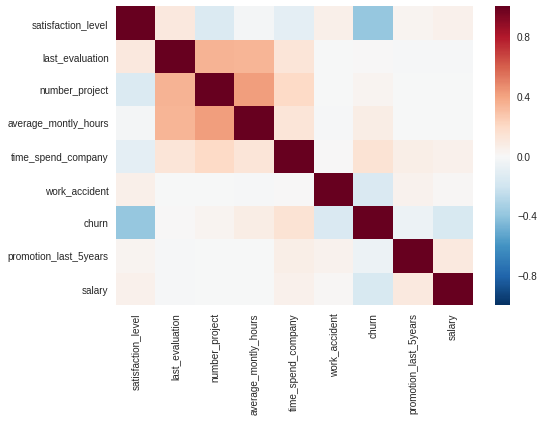

In [11]:
sns.heatmap(people_data.corr())
plt.show()

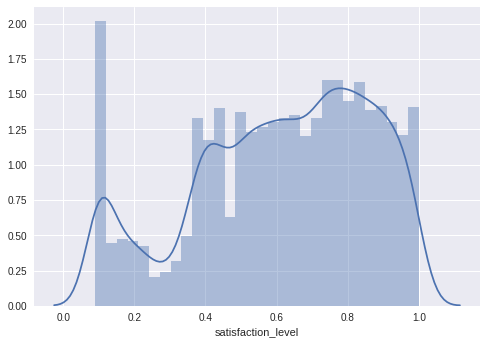

In [12]:
sns.distplot(people_data.satisfaction_level)
plt.show()

In [0]:
people_data = people_data.join(departments)

## Predictive Analytics

Starting from here we will start applying predictive analytics on the people_data that we have transformed above. Our target is to predict employee **churn**. We will use everythins else (all other variables) predict it. As **churn** takes only two values, 0 and 1, we need to apply some classifications algorithms. As we know, when choosing an algorithm in predictive analytics, there are many tradeoffs we need to take into account.
1. Interpretability vs Accuracy: some algorithms are able to provide more accurate results than others, yet cannot be economically interpreted. Neaural Network is an example of a such algorithm. As in People analytics we care not only for Outcome but also about the Process, we want to understand the variables driving the Outcome. Thus, we need an algorithm that is Interpretable. For that reason we will use **Logistic Regression** and **Decision Tree** algorithms. Our expectation is that "**logit**" will be less accurate than "**tree**" as it is just a linear classifier and is not able to fit nonlinear dataset. 

2. Accuracy vs Generalization: While we should target to have as accurate algorithm as possible first, one thing else we need to take into account is generalization. We should have an algorithm that is developed based on our data, but can be used to make predictions for obervations (people) out of our dataset. In other words, we need to have an algorithm that does not **overfit** our dataset. Our expectation is that "**logit**" will hav eless overfitting than "**tree**" as being only one signle straight line does not allow the model to overfit.

Last but not least, we will split our dataset into Train and Test components. The algorithm will be developed based on the Train part, but it will be validated using Test component. Once we acchive an accurate model, we will start to tune it to fight overfitting.

In [0]:
# importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
# renaming the algorithms
# we do not give any arameter other than random_state=42
# thus, we will use for now default parameter values
model_tree = DecisionTreeClassifier(random_state=42)
model_logit = LogisticRegression(random_state=42)

In [0]:
y = people_data.churn
x = people_data.drop("churn",axis=1)

In [0]:
# split 75% train and 25% test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

#### Decision Tree (with default parameters)

In [18]:
# fit the tree with default parameters
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [19]:
# perfect accuracy on training set
model_tree.score(x_train,y_train)*100

100.0

In [20]:
# less accuracy on test, which speaks about overfitting
model_tree.score(x_test,y_test)*100

97.22666666666666

#### Logstic Regression (with default parameters)

In [21]:
# much lower accuracy compared to the perfect score of the tree
model_logit.fit(x_train,y_train)
model_logit.score(x_train,y_train)*100

79.5715174682194

In [22]:
# almost the same result on test, which speaks about the absence of overfitting
model_logit.score(x_test,y_test)*100

79.09333333333333

As you can see "**logit**" has much less accuracy than "**tree**". Moreover, the accuracy of logit is quite close to the benchmarked accuracy (i.e. 76% are staying, which means if we classify everybody as stayer we will have 76% accuracy). On the other hand, as provided by the close accuracy scores of train and test components, logit is not overfitting, while tree does.

Therefore, we will choose to use the tree model, as it has better accuracy, but we have to tune it to fight overfitting. First we will provide maximum depth for the tree to limit its growth then minimum sample size in the leafs. The latter will achieve same results as limiting depth.

#### Decision Tree (with max_depth=7)

In [23]:
# let's limit the depth now to 7
model_tree_7 = DecisionTreeClassifier(max_depth = 7, random_state=42)
model_tree_7.fit(x_train,y_train)
model_tree_7.score(x_train,y_train)*100

98.28429193706107

In [24]:
model_tree_7.score(x_test,y_test)*100

97.41333333333333

#### Decision Tree (with min_samples_leaf=100)

In [25]:
# let's limit the sample size in leafs to 100
model_tree_100 = DecisionTreeClassifier(min_samples_leaf=100,random_state=42)
model_tree_7.fit(x_train,y_train)
model_tree_7.score(x_train,y_train)*100

98.28429193706107

In [26]:
model_tree_7.score(x_test,y_test)*100

97.41333333333333

As shown by the accuracy scores, while we achieved worse results on the Training set, accuracy is higher on the Test component, compared to the default model

Next, we need to learn what are the important variables among all, that provided this result. We may also plot the tree.